# 1st Attempt using Canny Edge Detection.
Instructions from https://www.geeksforgeeks.org/implement-canny-edge-detector-in-python-using-opencv/

### Import Packages

In [9]:
import numpy as np 
import os 
import cv2 
import matplotlib.pyplot as plt 

### Defining the canny detector function

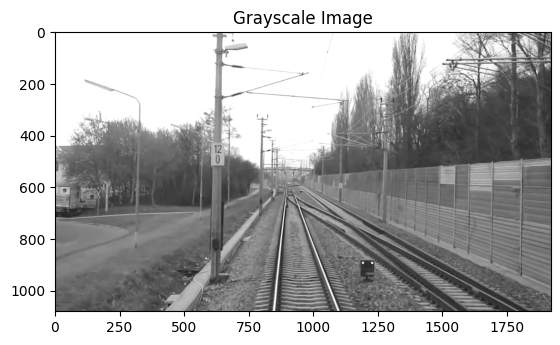

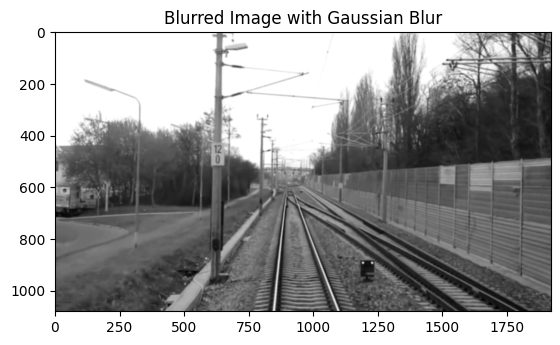

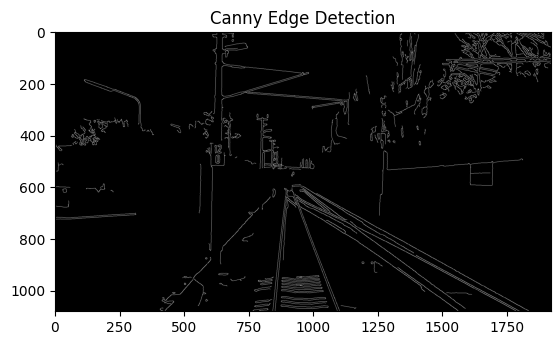

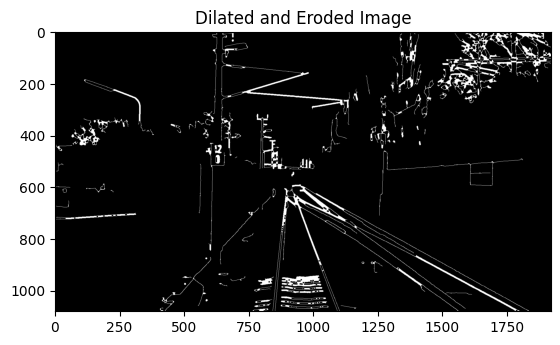

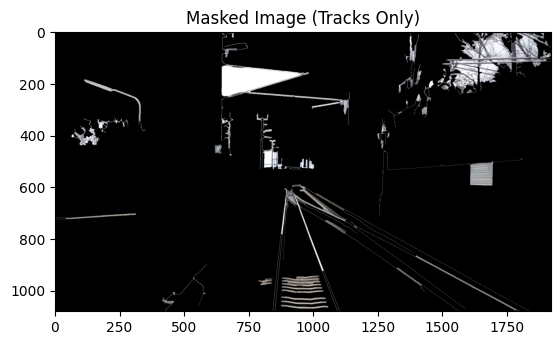

In [19]:
def Canny_detector(img, weak_th=None, strong_th=None): 
    # Step 1: Convert image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    plt.figure()
    plt.title("Grayscale Image")
    plt.imshow(img_gray, cmap='gray')
    plt.show()
    
    # Step 2: Apply stronger Gaussian Blur to reduce background noise
    img_blur = cv2.GaussianBlur(img_gray, (9, 9), 2.0)  
    plt.figure()
    plt.title("Blurred Image with Gaussian Blur")
    plt.imshow(img_blur, cmap='gray')
    plt.show()

    # Step 3: Canny Edge Detection
    gx = cv2.Sobel(np.float32(img_blur), cv2.CV_64F, 1, 0, 3) 
    gy = cv2.Sobel(np.float32(img_blur), cv2.CV_64F, 0, 1, 3) 
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True) 
    
    mag_max = np.max(mag) 
    if not weak_th: weak_th = mag_max * 0.1
    if not strong_th: strong_th = mag_max * 0.5
    
    canny_img = cv2.Canny(img_blur, weak_th, strong_th)  
    plt.figure()
    plt.title("Canny Edge Detection")
    plt.imshow(canny_img, cmap='gray')
    plt.show()

    return canny_img


def detect_and_mask_tracks(img, canny_img):
    # Step 4: Morphological Transformations to enhance the structure
    kernel = np.ones((5,5), np.uint8)
    canny_dilated = cv2.dilate(canny_img, kernel, iterations=1)
    canny_eroded = cv2.erode(canny_dilated, kernel, iterations=1)
    
    plt.figure()
    plt.title("Dilated and Eroded Image")
    plt.imshow(canny_eroded, cmap='gray')
    plt.show()
    
    # Step 5: Find contours
    contours, _ = cv2.findContours(canny_eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours based on size to avoid small noise
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]
    
    # Step 6: Create a mask for the region of interest (tracks)
    mask = np.zeros_like(canny_img)
    
    # Draw the filtered contours on the mask
    cv2.drawContours(mask, filtered_contours, -1, (255), thickness=cv2.FILLED)
    
    # Step 7: Mask out the background
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    
    plt.figure()
    plt.title("Masked Image (Tracks Only)")
    plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper color display in matplotlib
    plt.show()

    return masked_img

# Read the image
file_path = r"C:\Users\natha\OneDrive\Desktop\Applied Machine Learning\RailSem19_Dataset\jpgs\rs19_val\rs00059.jpg"  # images 14, 59
frame = cv2.imread(file_path)

# Step 7: Apply the Canny edge detection and mask the railroad tracks
canny_img = Canny_detector(frame)

masked_image = detect_and_mask_tracks(frame, canny_img)


In [12]:
def double_thresholding(self, low_threshold_ratio=0.1, high_threshold_ratio=0.3):
  '''
  Categorize pixels into: Strong, weak, and non-edges
  Apply threshold and preserve the strong and weak edges
  Reject the values that are below the weak threshold (non-edges)
  '''
  h_threshold = np.max(self.__gradient_magnitude) * high_threshold_ratio
  l_threshold = h_threshold * low_threshold_ratio
  
  # store edge status (strong, weak, or non-edge)
  strong_edges = (self.__gradient_magnitude >= h_threshold)
  weak_edges = (self.__gradient_magnitude >= l_threshold) & (self.__gradient_magnitude < h_threshold)
  
  # connect weak edges to strong edges
  self.__connected_edges = np.zeros_like(self.__gradient_magnitude)
  self.__connected_edges[strong_edges] = 255
  
  # apply edge connectivity to weak edges
  for x in range(self.__gradient_magnitude.shape[0]):
      for y in range(self.__gradient_magnitude.shape[1]):
          if weak_edges[x, y]:
              # check if any of the 8-connected neighbors are strong edges
              if (strong_edges[x - 1:x + 2, y - 1:y + 2].any()):
                  self.__connected_edges[x, y] = 255
  return self